<a href="https://colab.research.google.com/github/bagrezildo/aula_cnn/blob/main/aula_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural Convolucional para Classificação de Imagens Médicas

Por:
* **Matheus Miguel Lima (PPGBIOINFO - IMD/UFRN)**

* **Prof. Dr. Tetsu Sakamoto (IMD/UFRN)**


--
##Introdução

As Redes Neurais, ou Redes Neurais Artificiais, são um tipo de algoritmo de aprendizado de máquina inspirado no cérebro humano que imita a forma como neurônios enviam sinais uns para os outros.

Tais redes são compostas por uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada camada contem um nó, que possui um peso e um limite associados, caso esse limite seja passado, o nó será ativado e enviará as informações para a próxima camada.

<img src='https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png'>



Para construir uma Rede Neural Convolucional (CNN) fazemos o uso de diferentes tipos de camadas, cada uma com seu papel.

* **Camada de Convolução:** nessa camada são realizadas múltiplas operações de convolução em um determinado _input_, permitindo a utilização de diferentes kernels, aplicando ou não padding, resultado em diferentes saídas, para então essas saídas serem unidas e serem o resultado final da camada de convolução.

<img src='https://i.stack.imgur.com/I7DBr.gif'>

* **Camada de MaxPooling:** Pooling é o processo de reduzir a dimensionalidade das feature maps resultantes da camada de convolução, o que permite reduzir o número de parâmetros diminuindo o tempo de treinamento e overfitting. O tipo mais comum é o max pooling, que é simplesmente usar o maior valor do conjunto de input selecionado através de um quadro de pooling definido.

* **Camada Totalmente Conectada:** A camada totalmente conectada ocorre depois da convolução e do pooling. O resultado das camadas anteriores passa pelo processo de flatten e vira o input da camada totalmente conectada, que realiza a multiplicação desse input com uma outra matriz, preparando o resultado para a próxima camada neural.

<img src='https://www.venturus.org.br/wp-content/uploads/2019/12/CNN.png'>


##Sobre os dados a serem utilizados
Vamos utilizar dados de imagens médicas pertencentes ao Curated Chest X-Ray Image Dataset for COVID-19, um dataset curado a partir de outras coleções publicamente disponíveis. A mesma contém 9208 imagens de raio-x torácico para casos COVID-19 positivo, junto com imagens normais e de pneumonia viral e pneumonia bacteriana, divididas em 4 classes. Porém, na aula de hoje vamos usar apenas uma parte daas imagens de casos normais e COVID-19 positivo.

O dataset completo está disponível em < https://www.kaggle.com/unaissait/curated-chest-xray-image-dataset-for-covid19 >


## Bibliotecas conhecidas
* Keras do TensorFlow
* TensorFlow
* PyTorch
* scikit-learn


## O que devemos fazer?

1.   Conjunto de Dados
2.   Interface de Carregamento de Dados
3.   Arquitetura da Rede Convolucional
4.   Metodologia de Treinamento e Obtenção do Modelo
5.   Classificação dos Dados



# 1. Conjunto de Dados

Download do Conjunto de Dados que vamos utilizar

https://drive.google.com/file/d/16PJWUAgQk4-rdBgimJohm-xAVqo_N4Dz/view?usp=share_link


In [ ]:
#Descompactar os arquivos
!unzip /content/Dataset.zip

In [ ]:
#Caso queira utilizar a conexão com o google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
teste = './Dataset/teste'
treino = './Dataset/treino'
validacao = './Dataset/validacao'

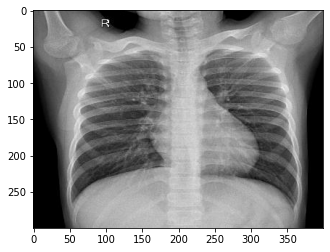

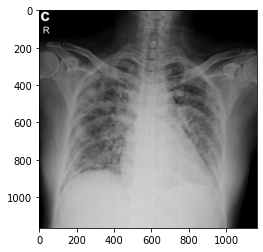

In [ ]:
import matplotlib.pyplot as plt
import numpy

normal = plt.imread('Dataset/treino/normal/Normal (100).jpg')
covid = plt.imread('Dataset/treino/covid/COVID-19 (57).jpg')
plt.subplot
plt.imshow(normal)
plt.show()
plt.imshow(covid)
plt.show()

# 2. Interface de Carregamento de Dados

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator() ##cria instância da classe

batch_size = 32 ##tamanho do lote de imagens que vai ser carregado
target_size = (256,256) ##definição da dimensão das imagens
input_shape = (256, 256, 3) ##indicação da dimensão das imagens, junto com o tipo, nesse caso RGB

##carregamento de cada subconjunto
train = image_gen.flow_from_directory(treino, class_mode='categorical', shuffle=False, batch_size=batch_size, target_size=target_size)

valida = image_gen.flow_from_directory(validacao, class_mode='categorical', shuffle=False, batch_size=batch_size, target_size=target_size)

test = image_gen.flow_from_directory(teste, class_mode='categorical', shuffle=False, batch_size=batch_size, target_size=target_size)

Found 214 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


# 3. Arquitetura da Rede Convolucional

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam as Adam

model = Sequential()
model.add(InputLayer(input_shape=input_shape)) #camada de entrada

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same')) #camada de convolução 1
model.add(MaxPool2D(pool_size=(2, 2), padding='same')) #camada de MaxPooling 1

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='same')) #Camada de convolução 2
model.add(MaxPool2D(pool_size=(2, 2), padding='valid')) #camda de MaxPooling 2
model.add(BatchNormalization()) #Camada de Normalização

model.add(Conv2D(75, (5, 5), activation='relu', strides=(1, 1), padding='same')) #Camada de Convolução 3
model.add(MaxPool2D(pool_size=(2, 2), padding='valid')) #Camda de MaxPooling 3
model.add(BatchNormalization()) #Camada de Normalização 2

model.add(Flatten()) #Camada de Flattening

model.add(Dense(units=100, activation='relu')) #Camada Totalmente Conectada 1
model.add(Dropout(0.5)) #Camda de Dropout 1
model.add(Dense(units=100, activation='relu')) #Camada Totalmente Conectada 2
model.add(Dropout(0.5)) #Camada de Dropout 2

model.add(Dense(units=2, activation='softmax')) #Camada Totalmente Conectada 4

adam = Adam(learning_rate=0.0001)  #Definição do algoritmo de aprendizado
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) #Compilação do modelo


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 25)      1900      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 25)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 50)      31300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 50)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 50)       200       
 ormalization)                                                   
                                                        

# 4. Metodologia de Treinamento e Obtenção do Modelo

In [ ]:
result = model.fit(train, epochs=5, validation_data=valida)  ##Treinamento do modelo

Epoch 1/5
7/7 [==============================] - 70s 11s/step - loss: 1.9438 - accuracy: 0.6308 - val_loss: 0.0274 - val_accuracy: 0.9906
Epoch 2/5
7/7 [==============================] - 63s 10s/step - loss: 0.5944 - accuracy: 0.8411 - val_loss: 0.0991 - val_accuracy: 0.9811
Epoch 3/5
7/7 [==============================] - 61s 9s/step - loss: 0.3358 - accuracy: 0.9112 - val_loss: 0.0996 - val_accuracy: 0.9811
Epoch 4/5
7/7 [==============================] - 62s 9s/step - loss: 0.1397 - accuracy: 0.9393 - val_loss: 0.0494 - val_accuracy: 0.9906
Epoch 5/5
7/7 [==============================] - 63s 9s/step - loss: 0.1824 - accuracy: 0.9346 - val_loss: 0.0215 - val_accuracy: 0.9906


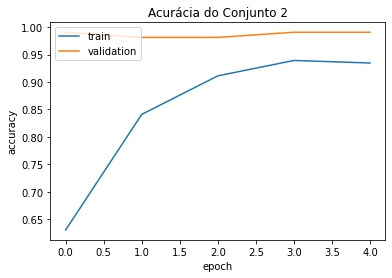

In [ ]:
##Mostra e salva a acurácia
import matplotlib.pyplot as plt
import numpy

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Acurácia do Conjunto 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig('Curated_20epochs_accuracy.png')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

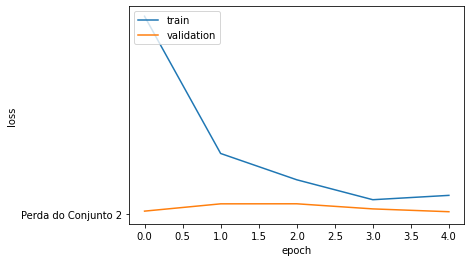

In [ ]:
#Mostra e salva a perda
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.plot('Perda do Conjunto 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig('Curated_20epochs_loss.png')
plt.show

# 5. Classificação dos Dados

In [ ]:
model.evaluate(test)  #Avaliação do modelo com o conjunto de teste

2/2 [==============================] - 4s 149ms/step - loss: 0.1162 - accuracy: 0.9706


[0.1161973774433136, 0.970588207244873]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test) ##Aplicação do modelo no conjunto de teste
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test.classes, y_pred))
print('Classification Report')
target_names = ['Covid', 'Normal']
print(classification_report(test.classes, y_pred, target_names=target_names))

2/2 [==============================] - 4s 148ms/step
Confusion Matrix
[[11  0]
 [ 1 22]]
Classification Report
              precision    recall  f1-score   support

       Covid       0.92      1.00      0.96        11
      Normal       1.00      0.96      0.98        23

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



# 6. Outros datasets

Curates X-Ray Dataset: https://drive.google.com/file/d/1hby1MnUXFtspxcVsS22PahtwTWdpY5UP/view?usp=share_link

Covid-19 Radiography Dataset: https://drive.google.com/file/d/1rcK9SIReLF64PzagB4sIPMr37AKOnDB8/view?usp=share_link

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(!wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=16PJWUAgQk4-rdBgimJohm-xAVqo_N4Dz' -O- | !sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=16PJWUAgQk4-rdBgimJohm-xAVqo_N4Dz" -O Dataset.zip && !rm -rf /tmp/cookies.txt